# ChemProp2: Prioritizing Biotransformations in non-targeted metabolomics Data

**Updated on:** 2023-03-06 14:17:28 CET

In this Jupyter Notebook we perform correlation between a node pair in a molecular network to know if there is a potential biotransformation.

<div class="alert alert-block alert-info">
    
**Authors**: Abzer Kelminal (abzer.shah@uni-tuebingen.de), Daniel Petras (daniel.petras@uni-tuebingen.de)<br>
**Input files**: Feature table, metadata, network node pair file, annotation file (optional) <br>
**Input file format**: .txt,.tsv and .csv files <br>
**Outputs**: .csv files, .pdf & .svg images  <br>
**Dependencies:** ggplot2, dplyr, svglite
    
The session info at the end of this notebook gives info about the versions of all the packages used here.
    </div>

A guide on how to run R within a Jupyter Notebook can be found here: [Installing via Anaconda Navigator](https://github.com/Functional-Metabolomics-Lab/Jupyter-Notebook-Installation/blob/main/Anaconda_Rkernel_installation_JupyterNotebook_JupyterLab.pdf), [Installation of R Jupyter Notebook through command terminal](https://developers.refinitiv.com/en/article-catalog/article/setup-jupyter-notebook-r)

---

<b> Before starting to run this notebook with your own data, remember to save a copy of this notebook in your own Google Drive! Do so by clicking on File &rarr; Save a copy in Drive. You can give whatever meaningful name to your notebook.
This file should be located in a new folder of your Google Drive named 'Colab Notebooks'. You can also download this notebook: File &rarr; Download &rarr; Download .ipynb.</b>

---

<div class="alert alert-block alert-warning">
<b><font size=3> SPECIAL NOTE: Please read the comments before proceeding with the code and let us know if you run into any errors and if you think it could be commented better. We would highly appreciate your suggestions and comments!!</font> </b> </div>

# <font color ='blue'> 1. Introduction </font>
<a name='intro'></a>

<font size=3><i>(To be edited) </i></br>
    
-  <p style='text-align: justify;'> Using this notebook, you will be able to determine the Chemical Proportionality (also known as ChemProp2) scores of the putative pairs in your feature-based molecular network (FBMN) and prioritize potential biotransformations within those networks. </p>
-  <p style='text-align: justify;'> The ChemProp2 script uses information from FBMN ouput, such as Network edge pair file, which contains information about all the pairs of nodes in a feature-based molecular network, the pairs being two structurally or chemically related compounds that are connected by an edge in the network.</p>
-  <p style='text-align: justify;'> <font color='red'>It is important to have sequential data (with respect to time or space) to perform ChemProp2 and a minimum of 2 sequential points (eg: a starting timepoint and an end timepoint) are necessary to observe the biotransformation.</font> ChemProp2 considers all data points in the sequence to find the correlation score between these possibly related compounds. </p> 
-  <p style='text-align: justify;'><b>The score ranges from -1 to 1. The + or - sign indicates the direction of potential biotransformation and the value between 0 and 1 indicates the strength of correlation.</b>  These scores can be then used to prioritize and visualize the directionality of these potential biochemical alterations directly in the molecular network. </p>

[Click the link for a better understanding of ChemProp2](https://www.functional-metabolomics.com/chemprop2)
<i>(Link to be changed in the future) </i>

---

## The input files needed for ChemProp:
<font color='red'>(To be edited)</font>

1. <p style='text-align: justify;'> <b> Feature table (or Quantification table): </b> A typical output file of an LC-MS/MS metabolomics experiment, containing all mass spectral features (or peaks) with their corresponding relative intensities across samples. The feature table we use in this tutorial was obtained from MZmine3. (Filetype: .csv file) </p>
2. <p style='text-align: justify;'> <b> Metadada: </b> An Excel file saved in .txt format that is created by the user, providing additional information about the samples (e.g. sample type, tissue type, species, timepoint of collection etc.) In this tutorial we are using the <a href="https://ccms-ucsd.github.io/GNPSDocumentation/metadata/">metadata format recognized by GNPS workflows</a>. The first column should be named 'filename' and all remaining column headers should be prefixed with ATTRIBUTE_: e.g. ATTRIBUTE_SampleType, ATTRIBUTE_timepoint etc. (Filetype: .txt file) </p>
3. <p style='text-align: justify;'><b> Network edge file </b> has the information of Feature IDs that are similar (not the same) in the columns 'Feature_ID_1' & 'Feature_ID_2'. This file is an output of GNPS </p>
4. <b> OPTIONAL: Annotation table </b> <br>
   One can provide the files for molecular annotations such as SIRIUS, CANOPUS, and GNPS annotation files.
      - SIRIUS performs molecular formula prediction.
      - CANOPUS performs chemical class predictions.
      - GNPS annotation files are obtained by performing FBMN analysis on the feature table.
<a href="https://gnps.ucsd.edu/ProteoSAFe/status.jsp?task=43cf48acbe24401e84a50ab2069b3d26">The FBMN job is also publicly available.</a> <i> (change the link)</p>

   <p style='text-align: justify;'>FBMN also offers the option to annotate compounds through GNPS spectral library search or an advanced analog search. These annotated files can be found in the sub-folders <b>"DB_result"</b> and <b>"DB_analog_result"</b> (if analog search is performed). Analog search method searches for structurally related molecules within the molecular network using a score threshold, such as a minimum cosine score that MS/MS spectra should achieve in spectral matching with MS/MS spectral libraries to be considered an annotation.</p>

Feature table and metadata used in this tutorial can be accessed at <a href="https://github.com/Functional-Metabolomics-Lab/ChemProp2/tree/main/ChemProp2_%20Test">our Functional Metabolomics Git Repository.</a>


[![More on MZmine](https://img.shields.io/badge/More%20on-MZmine-blue)](https://www.nature.com/articles/s41587-023-01690-2)
[![More on GNPS](https://img.shields.io/badge/More%20on-GNPS-informational)](https://www.nature.com/articles/nbt.3597#Abs2)
[![More on FBMN](https://img.shields.io/badge/More%20on-FBMN-blue)](https://www.nature.com/articles/s41592-020-0933-6) 
[![More on SIRIUS](https://img.shields.io/badge/More%20on-SIRIUS-blue)](https://boecker-lab.github.io/docs.sirius.github.io/)

---

# <font color ='blue'> 2. Preliminary setup for the notebook </font>
<a name='Section-2'>

## <font color ='darkblue'> 2.1 Package installation </font>
<a id = 'pkg_install'></a>

In [ ]:
options(install.packages.compile.from.source="never")

In [3]:
if (!require("pacman")) install.packages("pacman") #Installing pacman if not present

Loading required package: pacman



<font color="red"><font size=3> Installation will take about 15 mins !!</font>

In [4]:
pacman::p_load("tidyverse","factoextra","KODAMA","vegan","IRdisplay","svglite")

- tidyverse - used for data science. The eight core packages inside this library are: ggplot2 (data visualisation), dplyr (data manipulation), tidyr, readr, purrr, tibble, stringr, and forcats
- factoextra - for extracting and visualizing outputs of multivariate analyses such as PCA, k-means
- vegan - popular library for analysing ecological diversity and for multivariate analysis of community data. Here, we use it for PCoA
- IRdisplay - better display of output cells in Jupyter Notebooks running iwth IRKernel. Library not needed when running the script in RStudio
- KODAMA - to use the normalisation function
- svglite - to save plots in .svg format: although 'ggsave' function is provided in ggplot2 to save as .svg, for plots that are not ggplots, such as heatmaps, 'ggsave' will not work. Hence, we use svglite
- ggsci - provides color palettes for ggplot2 that can be used for scientific journals
- matrixStats - contains highly optimized functions to perform statistics on matrix data
- cowplot - efficient functions to arrange several plots

We also set some global options to adjust plot size throughout the notebook

In [5]:
#Global settings for plot size in the output cell:
options(repr.plot.width=10, repr.plot.height=10,res=600) # the parameters: width, height & resolution can be changed

## <font color ='darkblue'> 2.2 Setting a local working directory </font>
<a name = "set_dir"></a>

<p style='text-align: justify;'> When we set a folder (or directory) as the working directory, we can access the files within the folder just by its names without mentioning the entire file path everytime we use it. Also, all the output files will be saved under the working directory. So, before proceeding with the script further, if you are trying to use your own files for the notebook, then please make sure to include all the necessary input files in one local folder and set it as your working directory. </p>

<div class="alert alert-block alert-warning">
<b>NOTE:</b> When you run the next cell, it will display an output box where you can simply enter the path of the folder containing all your input files in your local computer. For example: D:\User\Project\Test_Data </div>

It will be set as your working directory and you can access all the files within it. <b> Whenever you see an output box asking for user input, please note, the script will not proceed further without your input. Hence, make sure to run the notebook cell-by-cell instead of running all cells in the notebook simultaneously. </b> 

<p style='text-align: justify;'>In Google Colab homepage &rarr; there are 3 icons on the upper left corner. Click on the 3 dots to see the contents of the notebook. To create a folder with your input files, click on the folder icon &rarr; Right-click anywhere on the empty space within the left section in Google Colab &rarr; Select 'new folder' &rarr; Copy the path and paste in the output box of next cell </p>

In [54]:
Directory <- normalizePath(readline("Enter the folder path in the output box: "),"/",mustWork=FALSE)
setwd(Directory)

Enter the folder path in the output box:  D:\Projects\Abzer\ChemProp2\20220907_Avermectin_GutBacteria\ChemProp Inputs


---

## <font color ='darkblue'> 2.3 Loading in and exploring the input files </font>
<a name='load_ip'></a>

<b>To upload files into Google Colab &rarr; Right-click on the folder you created to 'upload' the necessary files from your computer into the cloud session.</b>

### 2.3.1 Loading the data: Use one of the methods 
We can load the data files into the script either from the local working directory or from the web using url.

#### a. Loading files from a local folder

Please make sure to include all the necessary input files in the folder you have set as working directory

In [75]:
file_names <- list.files('.') #list all the files in the working directory (mentioned by 'dot symbol')

# Loop through file_names and print each filename
for (i in 1:length(file_names)) {
  cat("[",i,"]", file_names[i], "\n")
}

[ 1 ] 20220919_GutBacteria_Avermectin_quant.csv 
[ 2 ] 20220919_metadata_avermectin_gutbacteria.txt 
[ 3 ] clustersummary_file.tsv 
[ 4 ] DB_analogresult.tsv 
[ 5 ] DB_result.tsv 
[ 6 ] Final_metadata_without_blanks.csv 
[ 7 ] Helper_functions_Chemprop2.ipynb 
[ 8 ] Helper_functions_Chemprop2.r 
[ 9 ] network_edge.tsv 
[ 10 ] Normalised_Quant_table.csv 


<p style='text-align: justify;'><font color="red"> For your own dataset, change the file numbers in the next cell accordingly. </font> Here, we are importing three tables: the feature table (<b>ft</b>), the metadata table (<b>md</b>), and the network node pair table (<b>nw</b>).</p> 

In [77]:
ft <- read.csv(file_names[1], header = T, check.names = F)             
md <- read.csv(file_names[2], header = T, check.names = F, sep = '\t') # mention seperator as "\t"(tab-separated) in case of txt or tsv files
nw <- read.csv(file_names[9], header = T, check.names = F, sep = '\t') 

In [76]:
gnps_an <- read.csv(file_names[4], header = T, check.names = F, sep = '\t')
gnps <- read.csv(file_names[5], header = T, check.names = F, sep = '\t')

#give names for sirius and canopus as well

<p style='text-align: justify;'>When importing each file, it is important to ensure that the separator used is specified correctly. By default, the read.csv function uses a comma (',') as the separator. However, if you are importing files with different separators, you will need to change the separator parameter accordingly.</p>

Once the files are loaded, you can view the files as shown in [Section 2.3.3](#view_ip)

#### b. Loading files using URL (skip this now)

<p style='text-align: justify;'> In this section, we provide an example of how to retrieve data from a URL. If you are working with your own dataset in a Google Colab environment, you can obtain the file URL by first loading the input files into the Colab workspace, right-clicking on the file, selecting "Copy path", and then replacing the URL in the subsequent cell.</p>

In [17]:
ft_url <- 'https://raw.githubusercontent.com/Functional-Metabolomics-Lab/ChemProp2/main/ChemProp2_%20Test/feature_table_ChemProp2.txt'
md_url <- 'https://raw.githubusercontent.com/Functional-Metabolomics-Lab/ChemProp2/main/ChemProp2_%20Test/metadata_ChemProp2.txt'
nw_url <- 'https://raw.githubusercontent.com/Functional-Metabolomics-Lab/ChemProp2/main/ChemProp2_%20Test/Network_Edges_ChemProp2.txt'

#### c. Loading files directly from GNPS (skip this now)

One can also load the files directly from the repositories [MassIVE](https://massive.ucsd.edu/ProteoSAFe/static/massive.jsp) or [GNPS](https://gnps.ucsd.edu/ProteoSAFe/static/gnps-splash.jsp). If one has performed FBMN on their feature table, the files (both, input and output files from FBMN) can be accessed by  providing the task ID in the next cell. Task ID can be found by:  Go to your <b>MassIVE</b> or <b>GNPS</b> account &rarr; Jobs &rarr; unique ID is provided for each job in  'Description' column.

<table>
<thead>
<tr><th>Description</th><th>User</th><th>Workflow</th><th>Workflow Version</th><th>Status</th><th>Protected</th><th>Create Time</th><th>Total Size</th><th>Site</th><th>Delete Task</th></tr>
</thead>
<tbody>
<tr><td><font color="red">ID given here</font></td><td>-</td><td>FBMN</td><td>-</td><td>-</td><td>-</td><td>-</td><td>-</td><td>GNPS</td><td>-</td></tr>
</tbody>
</table>

In [ ]:
taskID <- "43cf48acbe24401e84a50ab2069b3d26" # Enter the task ID here

In [ ]:
ft_url <- paste0('https://proteomics2.ucsd.edu/ProteoSAFe/DownloadResultFile?task=',taskID,'&file=quantification_table_reformatted/&block=main')
an_url <- paste0('https://proteomics2.ucsd.edu/ProteoSAFe/DownloadResultFile?task=',taskID,'&file=DB_analogresult/&block=main')
md_url <- paste0('https://proteomics2.ucsd.edu/ProteoSAFe/DownloadResultFile?task=',taskID,'&file=metadata_merged/&block=main')

<blockquote>Make sure your metadata has enough columns (ATTRIBUTES) describing your data. The metadata given for FBMN might contain only few columns, however for downstream statistical analysis, one might need more attributes. In such cases, load the metadata file from a local folder</blockquote>

### 2.3.2 Reading the url from options b,c

In [47]:
ft <- read.csv(ft_url, header = T, check.names = F, sep = '\t') 
md <- read.csv(md_url, header = T, check.names = F, sep = '\t')
nw <- read.csv(nw_url, header = T, check.names = F, sep = '\t')

### 2.3.3 Viewing the input files
<a id='view_ip'></a>

Lets check how the data looks, the below lines of code show the first 6 rows of the feature and metadata tables as well as their dimensions (numbers of rows and columns)

In [57]:
head(ft) #returns the first 6 rows as default
dim(ft) # gives the number of rows and  columns

,row ID,row m/z,row retention time,row ion mobility,row ion mobility unit,row CCS,correlation group ID,annotation network number,best ion,auto MS2 verify,...,GutBac_Rep3_t240.mzML Peak area,GutBac_Rep3_t20.mzML Peak area,GutBac_Rep3_t30.mzML Peak area,GutBac_Rep3_t720.mzML Peak area,GutBac_Rep3_t180.mzML Peak area,GutBac_Rep2_t20.mzML Peak area,GutBac_Rep2_t720.mzML Peak area,GutBac_Rep3_t1.mzML Peak area,GutBac_Rep3_t120.mzML Peak area,
,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<int>,<int>,<chr>,<lgl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,524,150.0775,0.3365059,NA,NA,NA,NA,NA,,NA,...,3550.589,18084.871,8549.794,5532.6200,3984.891,16944.318,6679.828,29543.668,10915.597,NA
2,3485,150.0915,2.1897998,NA,NA,NA,NA,NA,,NA,...,2634.089,15989.818,6038.420,771.2174,6162.024,7341.516,5103.895,8737.668,9706.458,NA
3,3214,150.0915,1.9750485,NA,NA,NA,NA,NA,,NA,...,1656.589,3361.084,4352.861,4754.7285,7141.970,5365.618,9812.270,1868.412,9656.993,NA
4,3042,150.0915,1.8714100,NA,NA,NA,144,NA,,NA,...,13241.183,37411.246,15790.604,17183.4000,20183.488,16907.220,46171.043,22879.967,49095.688,NA
5,3626,150.0915,2.2835596,NA,NA,NA,271,NA,,NA,...,29847.133,29131.953,25287.785,38065.9650,40818.773,24881.709,55919.880,31423.201,23706.062,NA
6,384,150.9512,0.2635833,NA,NA,NA,NA,NA,,NA,...,0.000,0.000,0.000,0.0000,0.000,0.000,0.000,0.000,0.000,NA


[1] 3412  100

In [58]:
head(md, n=2) #returns the first 2 rows of md
dim(md)

,filename,ATTRIBUTE_sample,ATTRIBUTE_replicates,ATTRIBUTE_timepoint_minutes
,<chr>,<chr>,<int>,<int>
1,Avr_Bac_Rep1_t0.mzML Peak area,Avermectin + Gut bacteria,1,0
2,Avr_Bac_Rep1_t1.mzML Peak area,Avermectin + Gut bacteria,1,1


[1] 86  4

In [61]:
head(nw, n=2) #returns the first 2 rows of an
dim(nw)

,CLUSTERID1,CLUSTERID2,ComponentIndex,Cosine,DeltaMZ
,<int>,<int>,<int>,<dbl>,<dbl>
1,4665,5180,1,0.7252,18.010
2,2991,3274,2,0.8399,0.021


[1] 2843    5

---
### 2.3.4 Exploring the metadata
<a name='explore_md'></a>

In [62]:
#Loading in the helper functions from the additional R script:
source('https://raw.githubusercontent.com/Functional-Metabolomics-Lab/ChemProp2/main/Helper_functions_Chemprop2.r')

In [63]:
ncol(md) #number of columnns of metadata

[1] 4

In [64]:
InsideLevels(md[,2:ncol(md)]) #excluding 1st filename

INDEX,ATTRIBUTES,LEVELS,COUNT,ATTRIBUTE_CLASS
<int>,<chr>,<chr>,<chr>,<chr>
1,ATTRIBUTE_sample,"Avermectin + Gut bacteria, Blank, Only Avermectin drug, Only Gut bacteria","23, 3, 30, 30",character
2,ATTRIBUTE_replicates,"1, 2, 3","30, 30, 23",integer
3,ATTRIBUTE_timepoint_minutes,"0, 1, 10, 20, 30, 60, 120, 180, 240, 720","9, 9, 9, 8, 8, 8, 8, 8, 8, 8",integer


<p style='text-align: justify;'> The above table is a summary of our metadata table. For example, the 1st row says the different types of samples under 'ATTRIBUTE_sample', namely "Blank" and "Sample". The number of files corresponding to each of these categories is given in the COUNT column. For example, we have 3 files belonging to the "Blank" sample type. </p>

----
## <font color ='darkblue'> 2.4 Merging annotations with feature table</font>
<a name="merge_ft"></a>

In [ ]:
# Load the SIRIUS or CANOPUS summary table
# summary <- read.table("your_summary_table.txt", header = TRUE, stringsAsFactors = FALSE) # replace with your actual summary table file

In [79]:
head(gnps,2)

,SpectrumID,Compound_Name,Ion_Source,Instrument,Compound_Source,PI,Data_Collector,Adduct,Precursor_MZ,ExactMass,...,MoleculeExplorerDatasets,MoleculeExplorerFiles,InChIKey,InChIKey-Planar,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,...,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,CCMSLIB00003135371,Spectral Match to DL-Phenylalanine from NIST14,ESI,QQQ,Isolated,Data from Pieter Dorrestein,Data deposited by lfnothias,M+H,166.083,165.079,...,57,2653,COLNVLDHVKWLRT-UHFFFAOYSA-N,COLNVLDHVKWLRT,Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Small peptides,Aminoacids,Amino acids and Peptides|Shikimates and Phenylpropanoids
2,CCMSLIB00003138938,Spectral Match to Sulfadimethoxine from NIST14,ESI,qTof,Isolated,Data from Joshua Wollam,Data deposited by fevargas,M+H,311.080,310.074,...,133,24184,ZZORFUFYDOWNEF-UHFFFAOYSA-N,ZZORFUFYDOWNEF,Benzenoids,Benzene and substituted derivatives,Benzenesulfonamides,,,Alkaloids


In [80]:
head(gnps_an,2)

,SpectrumID,Compound_Name,Ion_Source,Instrument,Compound_Source,PI,Data_Collector,Adduct,Precursor_MZ,ExactMass,...,MoleculeExplorerDatasets,MoleculeExplorerFiles,InChIKey,InChIKey-Planar,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,...,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,CCMSLIB00003135371,Spectral Match to DL-Phenylalanine from NIST14,ESI,QQQ,Isolated,Data from Pieter Dorrestein,Data deposited by lfnothias,M+H,166.083,165.079,...,57,2653,COLNVLDHVKWLRT-UHFFFAOYSA-N,COLNVLDHVKWLRT,Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Small peptides,Aminoacids,Amino acids and Peptides|Shikimates and Phenylpropanoids
2,CCMSLIB00003138938,Spectral Match to Sulfadimethoxine from NIST14,ESI,qTof,Isolated,Data from Joshua Wollam,Data deposited by fevargas,M+H,311.080,310.074,...,133,24184,ZZORFUFYDOWNEF-UHFFFAOYSA-N,ZZORFUFYDOWNEF,Benzenoids,Benzene and substituted derivatives,Benzenesulfonamides,,,Alkaloids


In [97]:
merge_annotation <- readline("Do you want to merge your feature table with other annotation tables? (Y/N) ")

# Check if the response is 'Y' or 'y'
if (toupper(merge_annotation) == "Y") {
  # Source your R script
  source("C:/Users/abzer/OneDrive/Documents/GitHub/ChemProp2/ChemProp2_scripts/datacleanup_scripts/merge_annotations.r")
}


Do you want to merge your feature table with other annotation tables? (Y/N)  y


ID,Tables
<int>,<chr>
1,GNPS annotation
2,GNPS analog annotation
3,SIRIUS
4,CANOPUS
5,Escape


Please enter the numbers corresponding to the tables you want to merge with the feature table, separated by commas:


Your choices:  1


,ID,Tables
,<int>,<chr>
1,1,GNPS annotation


,row ID,row m/z,row retention time,row ion mobility,row ion mobility unit,row CCS,correlation group ID,annotation network number,best ion,auto MS2 verify,...,MoleculeExplorerDatasets,MoleculeExplorerFiles,InChIKey,InChIKey-Planar,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway
,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<int>,<int>,<chr>,<lgl>,...,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,285.0096,0.02633856,NA,NA,NA,NA,NA,,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,4,166.1227,0.05413009,NA,NA,NA,NA,NA,,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


The merged table 'merge_table' is given as follows:

---

## <font color ='darkblue'> 2.5 Arranging metadata and feature table in the same order</font>
<a name="arr_input_files"></a>

In [101]:
source("C:/Users/abzer/OneDrive/Documents/GitHub/ChemProp2/ChemProp2_scripts/datacleanup_scripts/arrange_ft_md.r")

Your new_ft table:



,row ID,row m/z,row retention time,correlation group ID,annotation network number,best ion,identified by n=,partners,neutral M mass,Avr_Bac_Rep2_t10.mzML,...,GutBac_Rep2_t180.mzML,GutBac_Rep3_t240.mzML,GutBac_Rep3_t20.mzML,GutBac_Rep3_t30.mzML,GutBac_Rep3_t720.mzML,GutBac_Rep3_t180.mzML,GutBac_Rep2_t20.mzML,GutBac_Rep2_t720.mzML,GutBac_Rep3_t1.mzML,GutBac_Rep3_t120.mzML
,<int>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X2_285.01_0.026_NA,2,285.0096,0.02633856,NA,NA,,NA,,NA,31352.27,...,21206.94,7105.003,19034.215,27222.57,5091.567,18300.857,27369.81,29424.068,31372.82,8301.374
X4_166.123_0.054_NA,4,166.1227,0.05413009,NA,NA,,NA,,NA,35725.56,...,28648.79,36226.734,2841.817,33543.08,29613.550,1586.277,31765.92,4924.068,41463.85,9741.186


Your new_md table:



,filename,ATTRIBUTE_sample,ATTRIBUTE_replicates,ATTRIBUTE_timepoint_minutes
,<chr>,<chr>,<chr>,<chr>
1,Avr_Bac_Rep1_t0.mzML,Avermectin + Gut bacteria,1,0
2,Avr_Bac_Rep1_t1.mzML,Avermectin + Gut bacteria,1,1


[1] "You have all mzML files."


Number of files in the metadata also present in the feature table: 86

All filenames in the metadata match those in the feature table.

The number of rows and columns in our original feature table is: 3412 x 100


The number of rows and columns in our new feature table is: 3412 x 86


The number of rows and columns in our new metadata is: 86 x 4



Notice that the number of columns of the new feature table is the same as the number of rows in our new metadata. Now, we have both our feature table and metadata in the same order.

---

# <font color ='blue'> 3. Data-cleanup </font>
<a name ="data_cleanup"></a>

In [102]:
ft_t <- as.data.frame(t(new_ft)) #transposing the ft
ft_t <- ft_t %>% mutate_all(as.numeric)  #converting all values to numeric
identical(new_md$filename,rownames(ft_t)) #should return TRUE now

[1] TRUE

In [115]:
source("C:/Users/abzer/OneDrive/Documents/GitHub/ChemProp2/ChemProp2_scripts/datacleanup_scripts/plot_PCoA.r")

Use the function as follows:  
plotPCoA(ft, md, distmetric = c("bray","euclidean", "maximum", "manhattan","canberra", "binary", "minkowski"), title = 'Principal coordinates plot'

ID,Column_Names_Metadata
<int>,<chr>
1,filename
2,ATTRIBUTE_sample
3,ATTRIBUTE_replicates
4,ATTRIBUTE_timepoint_minutes


Enter the number corresponding to the metadata column you want to use for PCoA:  2


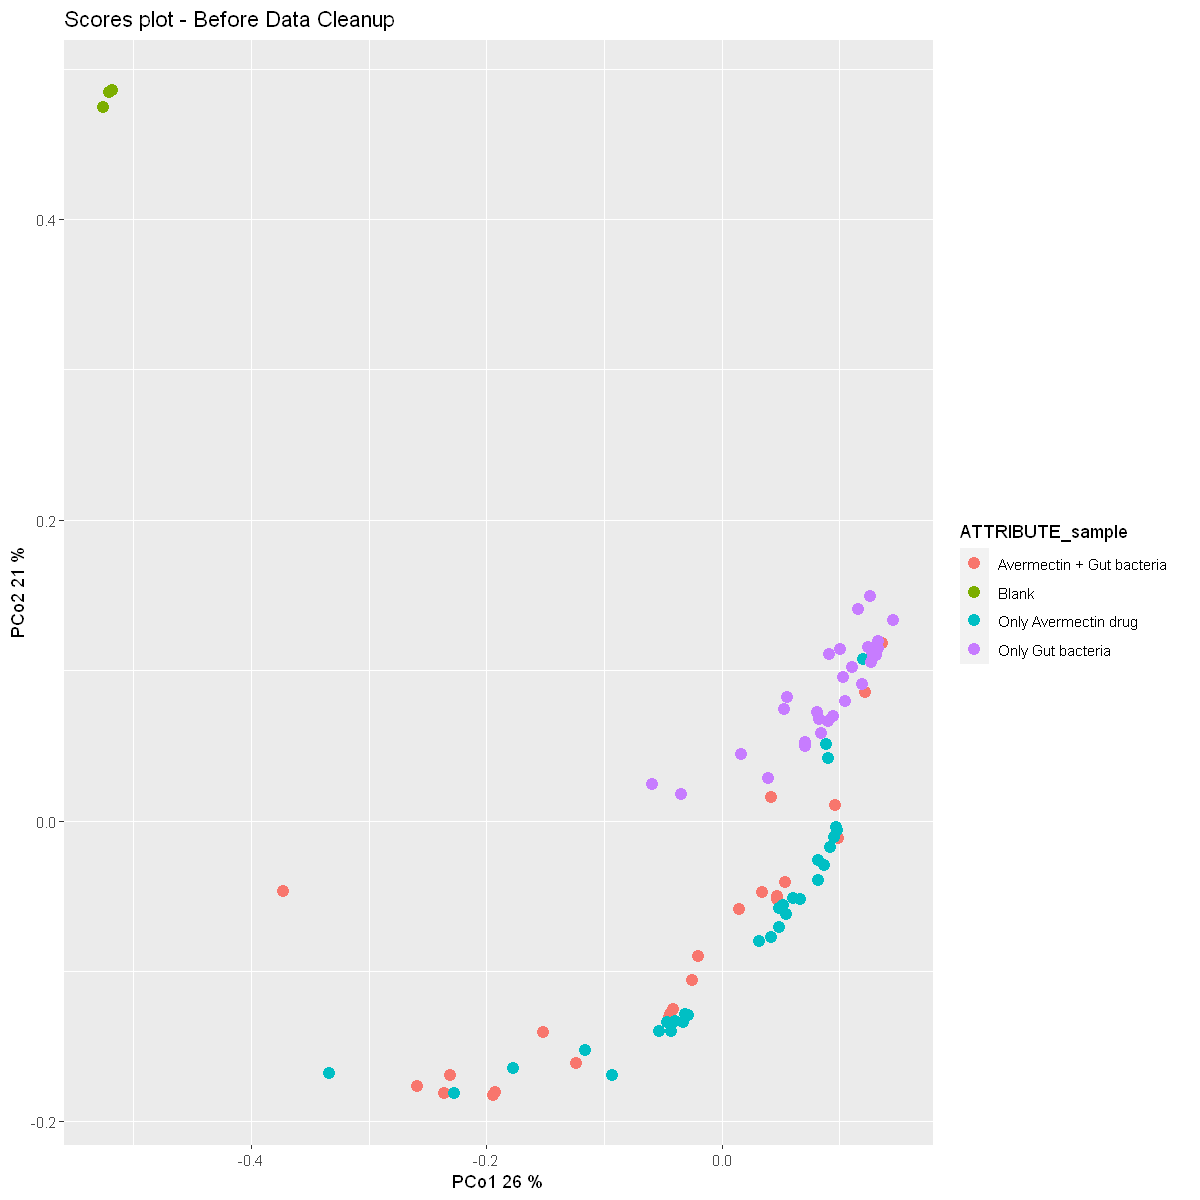

In [118]:
before_cleanup <- plotPCoA(ft_t, new_md, distmetric = 'canberra', title = "Scores plot - Before Data Cleanup")
before_cleanup

In [119]:
ggsave("PCoA_plot_before_blankremoval.svg",before_cleanup) #saving the plot

Saving 6.67 x 6.67 in image


As a first step of data-cleanup step, lets merge the metadata and feature table (transposed) together.

In [37]:
#merging metadata (new_md) and transposed feature table based on the sample names
ft_merged <- merge(new_md,ft_t, by.x= "filename", by.y=0,all.x=TRUE) #by.x="filename" picks the filename column of new_md, by.y =0 indicates the rownames of ft_t
head(ft_merged, 3)

,filename,ATTRIBUTE_Sample.Type,ATTRIBUTE_Batch,ATTRIBUTE_Month,ATTRIBUTE_Year,ATTRIBUTE_Sample_Location,ATTRIBUTE_Replicate,ATTRIBUTE_Spot,ATTRIBUTE_Latitude,ATTRIBUTE_Longitude,...,X92628_241.068_14.313_NA,X92636_182.985_14.571_HARMANE CollisionEnergy:102040,"X92638_208.039_14.764_""methyl 3-oxo-2-[(3,4,5-trimethoxyphenyl)methylene]benzo[b]furan-5-carboxylate CollisionEnergy:102040""",X92639_167.013_14.697_NA,X92640_193.974_14.62_NA,X92641_194.117_14.485_NA,X92647_158.961_14.747_NA,X92648_154.99_14.807_NA,X92649_226.951_14.813_TRYPTOPHAN,"X92651_172.956_14.611_""6-methoxypurine, oxamethane CollisionEnergy:205060"""
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,SD_01-2018_1_a.mzXML,Sample,2,Jan,2018,1,a,1,32.93365,-117.2648,...,36845.35,109542.04,68948.27,302706.5,42332.20,843127.0,22739.375,7517.194,0,0
2,SD_01-2018_1_b.mzXML,Sample,2,Jan,2018,1,b,1,32.93365,-117.2648,...,37898.94,114407.76,44469.50,298204.2,19698.92,824746.4,4960.220,10084.678,0,0
3,SD_01-2018_10_a.mzXML,Sample,2,Jan,2018,10,a,10,32.86261,-117.2604,...,32835.04,74416.95,12208.32,334345.6,28667.01,876652.8,5619.828,3481.216,0,0


In [52]:
write.csv(ft_merged,paste0(Sys.Date(),'_Ft_md_merged.csv'),row.names =TRUE) # This file can be used for batch correction

<div class="alert alert-block alert-warning">
<b><font size=3> Skip the Batch correction section if you do not have multiple batches !! </font> </b> </div>

## <font color ='darkblue'> 3.1. Batch Correction (Optional) </font>
<a name="batch_corr"></a>

Follow the notebook for Batch Correction: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Functional-Metabolomics-Lab/FBMN-STATS/blob/main/Individual_Notebooks/R-Notebooks/Batch_Correction.ipynb)

## <font color ='darkblue'> 3.2 Blank removal </font>  
<a name="blank_rem"></a>

<p style='text-align: justify;'> Blank samples contain no analytes of interest and consist, for example, of the solvent, matrix, tissue or growth media that was used to prepare or dissolve the samples and analytes of interest. Such as the analytes, the mass spectral features deriving from blank samples are also detected by the LC-MS/MS instrument.
We need to remove these blank features to obtain accurate results.</p>

<p style='text-align: justify;'>To eliminate these blank features, we initially split the feature table into blanks and samples, and then employ a cutoff filter. Next, we compute the average feature intensities for the blanks and samples, and subsequently calculate the ratio of average_feature_blanks to average_feature_sample. We compare this ratio against the user-defined cutoff to determine which features to be removed. When the cutoff is set to 0.3, it implies that for any feature, up to 30% contribution from the blank and 70% from the sample are allowed. Hence any feature with a ratio greater than 0.3 is removed. By using a lower cutoff, such as 10% (0.1), we would demand a greater contribution from the sample (90%) and restrict the blank's contribution to 10%. Raising the cutoff leads to fewer background features being identified and more analyte features being observed. Conversely, lowering the cutoff is more rigorous and leads to the removal of more features.</p>

### 3.2.1 Splitting data into blanks and samples using metadata
<a name="blank_split"></a>

In order to remove blank features from our samples, we first split our feature table into blanks and samples using the metadata and our InsideLevels function created in [Section 2.3.2](#explore_md).

**<font color='red'> We use a cutoff of 0.3 </font>**, meaning that in order for a feature to be considered of interest, it needs to have a ratio of average_feature_blanks vs average_feature_sample <30%. <b>In the below cell you can interactively change the threshold to any value between 0.1 and 1. </b>

In [120]:
InsideLevels(new_md[2:ncol(new_md)])

INDEX,ATTRIBUTES,LEVELS,COUNT,ATTRIBUTE_CLASS
<int>,<chr>,<chr>,<chr>,<chr>
1,ATTRIBUTE_sample,"Avermectin + Gut bacteria, Blank, Only Avermectin drug, Only Gut bacteria","23, 3, 30, 30",character
2,ATTRIBUTE_replicates,"1, 2, 3","30, 30, 23",character
3,ATTRIBUTE_timepoint_minutes,"0, 1, 10, 120, 180, 20, 240, 30, 60, 720","9, 9, 9, 8, 8, 8, 8, 8, 8, 8",character


In [157]:
source("C:/Users/abzer/OneDrive/Documents/GitHub/ChemProp2/ChemProp2_scripts/datacleanup_scripts/remove_blanks.r")

In [146]:
blk_rem_results <- remove_blanks(ft_t,new_md)

Enter the column name for Sample Type in metadata:  ATTRIBUTE_sample


Please enter the ID numbers corresponding to the labels for blanks and samples, separated by commas:




ID,levels
<int>,<chr>
1,Avermectin + Gut bacteria
2,Only Avermectin drug
3,Blank
4,Only Gut bacteria


Enter the numbers for blanks:  3
Enter the numbers for samples:  1,2,4
Enter Cutoff value between 0.1 & 1:  0.3


[1] "Total no.of features: 3412"
[1] "No.of Background or noise features: 903"
[1] "No.of features after excluding noise: 2509"


Your Blank removed table: head(blk_rem,3)



,Avr_Bac_Rep1_t0.mzML,Avr_Bac_Rep1_t1.mzML,Avr_Bac_Rep1_t10.mzML,Avr_Bac_Rep1_t120.mzML,Avr_Bac_Rep1_t180.mzML,Avr_Bac_Rep1_t20.mzML,Avr_Bac_Rep1_t240.mzML,Avr_Bac_Rep1_t30.mzML,Avr_Bac_Rep1_t60.mzML,Avr_Bac_Rep1_t720.mzML,...,GutBac_Rep3_t0.mzML,GutBac_Rep3_t1.mzML,GutBac_Rep3_t10.mzML,GutBac_Rep3_t120.mzML,GutBac_Rep3_t180.mzML,GutBac_Rep3_t20.mzML,GutBac_Rep3_t240.mzML,GutBac_Rep3_t30.mzML,GutBac_Rep3_t60.mzML,GutBac_Rep3_t720.mzML
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1002_231.17_0.715_NA,50298.31,21635.83,20397.348,13253.05,3267.277,34023.77,222.8398,27353.08,15001.777,4962.125,...,57204.70,52072.95,45729.56,0.00,12095.42,38591.56,6135.828,29454.15,20424.07,6025.128
X1003_175.025_0.717_NA,27311.99,12652.35,9864.077,21843.31,23645.285,17389.87,12652.0980,15746.20,9692.443,19453.031,...,32019.19,30412.88,25575.12,30980.42,25124.41,22108.58,15796.289,20447.47,24534.11,19263.518
X1006_206.064_0.733_NA,96254.45,20015.02,19539.650,36158.43,45152.387,38794.57,16259.9180,29461.41,18119.111,21798.707,...,100331.62,87393.12,74795.55,74507.01,52874.42,56854.07,31590.785,45773.31,69054.88,23354.123


head(md_Samples,3)



,filename,ATTRIBUTE_sample,ATTRIBUTE_replicates,ATTRIBUTE_timepoint_minutes
,<chr>,<chr>,<chr>,<chr>
1,Avr_Bac_Rep1_t0.mzML,Avermectin + Gut bacteria,1,0
2,Avr_Bac_Rep1_t1.mzML,Avermectin + Gut bacteria,1,1
3,Avr_Bac_Rep1_t10.mzML,Avermectin + Gut bacteria,1,10


In [148]:
lengths(blk_rem_results)

blk_rem md_Samples 
        83          4

In [ ]:
blk_rem <- blk_rem_results$blk_rem
md_Samples <- blk_rem_results$md_Samples

In [44]:
write.csv(blk_rem, paste0(Sys.Date(),'_Blanks_Removed_with_cutoff_',Cutoff,'.csv'),row.names =TRUE)

In [ ]:
after_blk_rem <- plotPCoA(blk_rem, 
                          md_Samples, 
                          distmetric = 'canberra', 
                          title = "Scores plot - After Blank Removal")
after_blk_rem

## <font color ='darkblue'> 3.3 Imputation </font>
<a name = 'imp'></a>

<p style='text-align: justify;'> For several reasons, real world datasets might have some missing values in it, in the form of NA, NANs or 0s. Eventhough the gapfilling step of MZmine fills the missing values, we still end up with some missing values or 0s in our feature table. This could be problematic for statistical analysis. We cannot simply discard those rows or columns with missing values as we will lose valuable data. Instead we can try imputing or replacing the missing values in the data with a meaningful, reasonable guess. Here, first, we use the blank-removed feature table to assess frequencies across relative intensities. The plot from the below cell shows us how many features have which relative intensities. We then create random values between 0 and the minimum value in our blank-removed table and randomly replace all 0s with these random values. </p>

In [158]:
impute_results <- impute_table(blk_rem_results$blk_rem)

The limit of detection (LOD) is: 118

Creating random variables (between 0 and LOD) to replace all zeros...

The first 10 of the generated random values: 102.2, 24.2, 33.4, 26.8, 17.4, 15.1, 69, 107.6, 105.9, 27.6

Resulting imputed table: head(imp,3)



,Avr_Bac_Rep1_t0.mzML,Avr_Bac_Rep1_t1.mzML,Avr_Bac_Rep1_t10.mzML,Avr_Bac_Rep1_t120.mzML,Avr_Bac_Rep1_t180.mzML,Avr_Bac_Rep1_t20.mzML,Avr_Bac_Rep1_t240.mzML,Avr_Bac_Rep1_t30.mzML,Avr_Bac_Rep1_t60.mzML,Avr_Bac_Rep1_t720.mzML,...,GutBac_Rep3_t0.mzML,GutBac_Rep3_t1.mzML,GutBac_Rep3_t10.mzML,GutBac_Rep3_t120.mzML,GutBac_Rep3_t180.mzML,GutBac_Rep3_t20.mzML,GutBac_Rep3_t240.mzML,GutBac_Rep3_t30.mzML,GutBac_Rep3_t60.mzML,GutBac_Rep3_t720.mzML
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1002_231.17_0.715_NA,50298.31,21635.83,20397.348,13253.05,3267.277,34023.77,222.8398,27353.08,15001.777,4962.125,...,57204.70,52072.95,45729.56,102.20,12095.42,38591.56,6135.828,29454.15,20424.07,6025.128
X1003_175.025_0.717_NA,27311.99,12652.35,9864.077,21843.31,23645.285,17389.87,12652.0980,15746.20,9692.443,19453.031,...,32019.19,30412.88,25575.12,30980.42,25124.41,22108.58,15796.289,20447.47,24534.11,19263.518
X1006_206.064_0.733_NA,96254.45,20015.02,19539.650,36158.43,45152.387,38794.57,16259.9180,29461.41,18119.111,21798.707,...,100331.62,87393.12,74795.55,74507.01,52874.42,56854.07,31590.785,45773.31,69054.88,23354.123


In [159]:
lengths(impute_results)

Plot Table 
    9    83

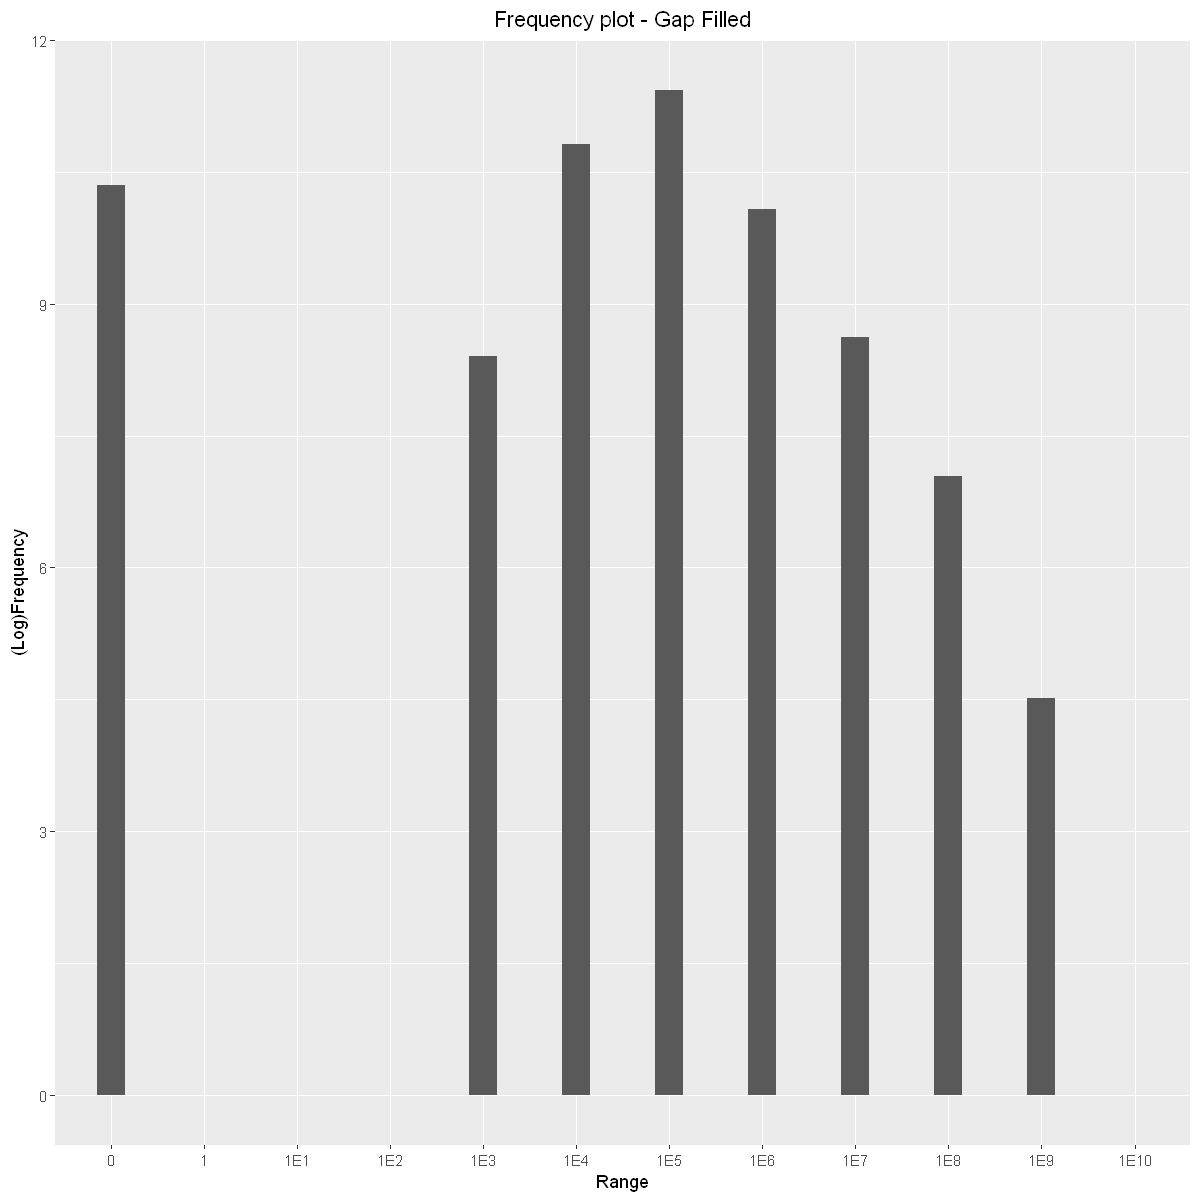

In [160]:
impute_results$Plot

The above histogram shows that, in our, blank-removed feature table, there are many zeros present. And no values in the range between 0 to 1E2. The minimum value greater than 0 in our dataframe is in between 1E2 & 1E3 (and that value is 892).

In [162]:
imp <- impute_results$Table

In [163]:
sum(imp==0) # checking if there are any zeros in our imputed table 

[1] 0

In [ ]:
write.csv(imp,paste0(Sys.Date(),'_Imputed_QuantTable.csv'),row.names =T)

In [ ]:
after_imp <- plotPCoA(imp, 
                      md_Samples, 
                      distmetric = 'canberra', 
                      title = "Scores plot - After Imputation")
after_imp

## <font color ='darkblue'> 3.4 Normalization </font>
<a name="norm"></a>

Normalization is performed to compensate for differences in total metabolite concentrations among samples (Y. Wu & Li,2016). Many normalization techniques can also correct the batch effects, such as those caused by sample pipetting or extraction. Here, we present 2 types of normalization: Total Ion Current(TIC) or (Probabilistic Quotient Normalization) PQN.

### 3.4.1 Total Ion Current (TIC) or sample-centric normalization
<a name="tic"></a>

In [61]:
norm_TIC <- normalization(t(imp), #performing normalization on transformed imputed data
                            method = "sum")$newXtrain #here, samples are normalized to the sum of the absolute value of all variables for a given sample
head(norm_TIC,n=3)
dim(norm_TIC)
print(paste('No.of NA values in Normalized data:',sum(is.na(norm_TIC)== T)))

,X10015_282.169_2.763_NA,X10035_325.139_2.817_NA,X10037_216.123_2.847_NA,X10047_338.159_2.845_NA,X10058_280.117_2.961_NA,X10059_414.175_2.851_NA,X10072_305.157_2.851_NA,X10074_283.175_2.851_Spectral Match to Hexaethylene glycol from NIST14,X10078_300.201_2.851_Spectral Match to Hexaethylene glycol from NIST14,X10082_309.144_2.886_NA,...,X9833_268.175_2.821_NA,X9860_240.144_2.824_NA,X9876_414.139_2.761_NA,X9884_190.05_2.832_NA,X9897_333.144_2.881_NA,X9909_400.16_2.813_NA,X9918_252.123_2.833_NA,X9957_402.139_3.01_NA,X9972_323.123_2.716_NA,X9995_276.159_2.805_NA
SD_01-2018_1_a.mzXML,2.977175e-05,1.146287e-04,5.291461e-05,0.0002611555,0.0001068795,0.0000708781,0.0003597461,0.001172543,0.001577941,1.207643e-07,...,6.365962e-05,2.555712e-04,5.320822e-05,6.676027e-05,4.321289e-05,1.438268e-04,0.0002617082,5.041191e-04,0.0001164462,7.469366e-05
SD_01-2018_1_b.mzXML,2.999528e-05,5.805570e-05,2.399888e-04,0.0001393665,0.0001598462,0.0001177603,0.0003073398,0.001129798,0.001603947,2.655696e-04,...,3.036384e-05,3.323701e-04,3.027890e-04,5.803523e-05,8.150427e-05,8.454055e-05,0.0004711154,4.532659e-04,0.0001187704,1.627856e-04
SD_01-2018_10_a.mzXML,7.230727e-05,9.583535e-05,3.457870e-05,0.0002268790,0.0004349287,0.0000914086,0.0002488851,0.001006898,0.001440679,1.277168e-04,...,3.947752e-06,5.856588e-07,8.113338e-04,2.686943e-05,7.848346e-05,8.995930e-04,0.0007328199,6.864193e-05,0.0006325272,2.545104e-04


[1]  180 9092

[1] "No.of NA values in Normalized data: 0"


In [ ]:
write.csv(norm_TIC, paste0(Sys.Date(),'_TIC_Normalised_table.csv'),row.names =T)

In [ ]:
tic_t <- as.data.frame(t(norm_TIC)) #transposing the ft
tic_t <- tic_t %>% mutate_all(as.numeric)  #converting all values to numeric
identical(md_Samples$filename,rownames(tic_t)) #should return TRUE now

In [ ]:
after_tic <- plotPCoA(tic_t, 
                      md_Samples, 
                      distmetric = 'canberra', 
                      title = "Scores plot - After TIC normalization")
after_tic

### 3.4.2 Probabilistic Quotient Normalization (PQN)
<a name="pqn"></a>

In [62]:
norm_pqn <- normalization(t(imp), 
                            method = "pqn")$newXtrain
head(norm_pqn,n=3)
dim(norm_pqn)
print(paste('No.of NA values in Normalized data:',sum(is.na(norm_pqn)== T)))

,X10015_282.169_2.763_NA,X10035_325.139_2.817_NA,X10037_216.123_2.847_NA,X10047_338.159_2.845_NA,X10058_280.117_2.961_NA,X10059_414.175_2.851_NA,X10072_305.157_2.851_NA,X10074_283.175_2.851_Spectral Match to Hexaethylene glycol from NIST14,X10078_300.201_2.851_Spectral Match to Hexaethylene glycol from NIST14,X10082_309.144_2.886_NA,...,X9833_268.175_2.821_NA,X9860_240.144_2.824_NA,X9876_414.139_2.761_NA,X9884_190.05_2.832_NA,X9897_333.144_2.881_NA,X9909_400.16_2.813_NA,X9918_252.123_2.833_NA,X9957_402.139_3.01_NA,X9972_323.123_2.716_NA,X9995_276.159_2.805_NA
SD_01-2018_1_a.mzXML,3.540018e-05,1.362995e-04,6.291825e-05,0.0003105276,0.0001270854,8.427778e-05,0.0004277570,0.0013942151,0.001876255,1.435951e-07,...,7.569463e-05,3.038876e-04,6.326737e-05,7.938147e-05,5.138240e-05,1.710177e-04,0.0003111848,5.994241e-04,0.0001384606,8.881468e-05
SD_01-2018_1_b.mzXML,3.017861e-05,5.841053e-05,2.414556e-04,0.0001402183,0.0001608232,1.184801e-04,0.0003092183,0.0011367027,0.001613750,2.671927e-04,...,3.054942e-05,3.344015e-04,3.046396e-04,5.838994e-05,8.200242e-05,8.505726e-05,0.0004739948,4.560362e-04,0.0001194963,1.637805e-04
SD_01-2018_10_a.mzXML,5.255678e-05,6.965824e-05,2.513364e-05,0.0001649077,0.0003161294,6.644064e-05,0.0001809030,0.0007318671,0.001047162,9.283137e-05,...,2.869437e-06,4.256881e-07,5.897207e-04,1.953014e-05,5.704596e-05,6.538722e-04,0.0005326526,4.989262e-05,0.0004597545,1.849918e-04


[1]  180 9092

[1] "No.of NA values in Normalized data: 0"


In [ ]:
write.csv(norm_pqn, paste0(Sys.Date(),'_PQN_Normalised_Quant_table.csv'),row.names =T)

In [ ]:
pqn_t <- as.data.frame(t(norm_pqn)) #transposing the ft
pqn_t <- pqn_t %>% mutate_all(as.numeric)  #converting all values to numeric
identical(md_Samples$filename,rownames(pqn_t)) #should return TRUE now

In [ ]:
after_pqn <- plotPCoA(pqn_t, 
                      md_Samples, 
                      distmetric = 'canberra', 
                      title = "Scores plot - After PQN normalization")
after_pqn

## <font color ='darkblue'> 3.5 Scaling </font>
<a name='scaling'></a>

One can also perform center-scaling after imputation. Scaling is typically done to make sure that the data is centered around 0 and has a consistent spread to adjust for differences in offset between high and low-abundant metabolites, thus leaving only relevant variation for analysis. 

In [63]:
Imp_t <- as.data.frame(t(imp)) #transposing the imputed table
Imp_t <- Imp_t[match(md_Samples$filename,rownames(Imp_t)),] # ordering the rows in the Imp_t table according to the order of fiilenames column of md_Samples
identical(rownames(Imp_t),md_Samples$filename) #should return TRUE

[1] TRUE

When <b>center = TRUE</b>, then centering is done by subtracting the column means (omitting NAs) of x from their corresponding columns. No centering is done for <b>center=FALSE</b>.

* If scale = TRUE, center=TRUE,  then scaling is performed by dividing the centered columns of x by their standard deviations.
* If scale = TRUE, center=FALSE, then scaling is performed by dividing the columns of x by their root mean squares
* If scale is FALSE, no scaling is done.

In [64]:
Imp_s <- scale(Imp_t, center = T, scale = T) # center and scale data
head(Imp_s, n=2)

,X10015_282.169_2.763_NA,X10035_325.139_2.817_NA,X10037_216.123_2.847_NA,X10047_338.159_2.845_NA,X10058_280.117_2.961_NA,X10059_414.175_2.851_NA,X10072_305.157_2.851_NA,X10074_283.175_2.851_Spectral Match to Hexaethylene glycol from NIST14,X10078_300.201_2.851_Spectral Match to Hexaethylene glycol from NIST14,X10082_309.144_2.886_NA,...,X9833_268.175_2.821_NA,X9860_240.144_2.824_NA,X9876_414.139_2.761_NA,X9884_190.05_2.832_NA,X9897_333.144_2.881_NA,X9909_400.16_2.813_NA,X9918_252.123_2.833_NA,X9957_402.139_3.01_NA,X9972_323.123_2.716_NA,X9995_276.159_2.805_NA
SD_01-2018_1_a.mzXML,-1.130474,-0.2996871,-0.1117275,2.2186171,-1.452146,-0.1759304,-0.3434611,-0.1778404,-0.1933466,-0.98676658,...,0.50953425,0.3411530,-0.9690079,-0.2136334,-1.0317304,-0.3097998,-0.177995,1.167922,-0.9536029,-0.720846274
SD_01-2018_1_b.mzXML,-1.126516,-0.6037355,1.9885898,0.2986375,-1.028317,0.3848581,-0.3749450,-0.1894778,-0.1876122,0.01064504,...,0.09238905,0.5326194,1.0516269,-0.3038794,-0.1930184,-0.7478181,1.252001,0.955153,-0.9361819,-0.008639177


In [ ]:
write.csv(Imp_s, paste0(Sys.Date(),'_scaled_table.csv'),row.names =T)

In [ ]:
after_scaling <- plotPCoA(Imp_s, 
                      blk_rem_results$md_Samples, 
                      distmetric = 'canberra', 
                      title = "Scores plot - After TIC normalization")
after_scaling

### 5.1.1 PERMANOVA (skip this now)

<p style='text-align: justify;'> Permutational multivariate analysis of variance (PERMANOVA) is a non-parametric method for multivariate ANOVA, where P-values are obtained using permutations. The metric was originally developed within the field of ecology <a href ='https://onlinelibrary.wiley.com/doi/full/10.1002/9781118445112.stat07841'>(Anderson, 2008)</a> but is today widely used in other fields, including the microbiome and metabolomics field. PERMANOVA is used to compare groups of samples and it tests whether the centroid and/or the spread of the samples is different among the groups. Here, H0 states no differences among the groups and it is rejected when there is a significance difference among the groups. </p>

<p style='text-align: justify;'> The adonis2() function in the <a href ='https://cran.r-project.org/web/packages/vegan/index.html'>(vegan package)</a> can be used to perform a PERMANOVA. The input is any dissimilarity matrix and the test-statistic retrieved is a multivariate analogue to Fisher's F-ratio as well as an R2 value (Adonis R2). </p>

In [145]:
adonres <- adonis2(distm ~ md_Samples[,colnames(md_Samples) == 'ATTRIBUTE_Month'])
adonres

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"md_Samples[, colnames(md_Samples) == ""ATTRIBUTE_Month""]",2,385177.2,0.2366727,27.43978,0.001
Residual,177,1242290.8,0.7633273,NA,NA
Total,179,1627468.0,1.0000000,NA,NA


<p style='text-align: justify;'> The PERMANOVA test result tells us that there is a significant difference in the metabolomic profiles of seawater sampled during different months (PERMANOVA, P < 0.05, Adonis R2 = 0.2367) and that app. 23% of the variation in our data can be explained by month of sampling. As we already could clearly observe in the PCoA plot, this means that there are strong differences between the chemotypes of seawater sampled during different months. </p>

### 5.1.2 Perform PCoA and assess separation using PERMANOVA

<p style='text-align: justify;'> To speed up the analysis and so we don't have to rewrite the entire code when testing different parameters, we can define a function, which will perform a principal coordinates analysis (PCoA) using a distance metric of choice, calculate a PERMANOVA and plot results in a 2-D graph: </p>

In [146]:
plotPCoA <- function(ft, 
                     md, 
                     distmetric = c("bray","euclidean", "maximum", "manhattan","canberra", "binary", "minkowski"), 
                     collow = "#810f7c", colhigh ="#f7fcb9", catper = "plate", 
                     catcols = "plate", mdtype = 'categorical', 
                     cols = c('grey','black','orange','pink','darkgreen','darkred','brown','blue','skyblue3','green'),
                     title = 'Principal coordinates plot'){
    
    catper <<- catper
    distm <- vegdist(ft, method = distmetric)
    d <- as.matrix(distm)

    #Calculation perMANOVA
    if (length(which(is.na(md[,colnames(md) == catper]))) !=0){
          red <- as.dist(as.matrix(distm)[-which(is.na(md[,colnames(md) == catper])),-which(is.na(md[,colnames(md) == catper]))])
          adonres <- adonis2(red ~ na.omit(md[,colnames(md) == catper]))
          Rsq <- adonres$R2[1]
          pval <- adonres$'Pr(>F)'[1]
        } else {
          adonres <- adonis2(distm ~ md[,colnames(md) == catper])
          Rsq <- adonres$R2[1]
          pval <- adonres$'Pr(>F)'[1]
        }


   #computing multi-dimensional scaling on distance matrix
    PcoA <- cmdscale(distm, k =10, eig = T, add = T) # k=10 gets the first 10 Principal coordinates or PCOs
    PcoA_points <- as.data.frame(PcoA$points) #getting the PCOs into dataframe
    variance <- round(PcoA$eig*100/sum(PcoA$eig),1) # getting the variance explained by each PCo
    names(PcoA_points)[1:10] <- paste0('PCoA', seq(1,10))  #naming the 10 PCos
    PcoA_points$Group <- md[,colnames(md) == catcols][match(rownames(PcoA_points),rownames(md))]
    
    # plot
    cbPalette <- cols

    if (mdtype == 'continuous'){
        Tr_PcoA <- ggplot(PcoA_points, # plot on PCoA_points dataframe
                            aes(x = PCoA1, y = PCoA2, colour = Group, label = row.names(PcoA))) +
        geom_point(size=2.5) +
        scale_colour_gradient(low = collow, high = colhigh,space = "Lab", na.value = "grey50", guide = "colourbar",aesthetics = "colour") + 
        xlab(paste('PCoA1',variance[1],'%', sep = ' ')) +
        ylab(paste('PCoA2',variance[2],'%', sep = ' ')) +
        ggtitle(paste(title,paste0("(p=",round(pval,4),","),paste0("adonis-R2=",round(Rsq,4),")"),sep=" ")) +
        theme(panel.background = element_blank(),
              panel.border = element_rect(colour = "black", fill=NA, size=1)) 

        } else {
        Tr_PcoA <- ggplot(PcoA_points, 
                          aes(x = PCoA1, y = PCoA2, colour = Group, label = row.names(PcoA))) + 
        geom_point(size=2.5) +
        scale_colour_manual(values = cbPalette) +
        xlab(paste('PCoA1',variance[1],'%', sep = ' ')) +
        ylab(paste('PCoA2',variance[2],'%', sep = ' ')) +
        ggtitle(paste(title,paste0("(p=",round(pval,4),","),paste0("adonis-R2=",round(Rsq,4),")"),sep=" ")) +
        theme(panel.background = element_blank(),
              panel.border = element_rect(colour = "black", fill=NA, size=1)) 
        }
    
    print(Tr_PcoA)
}


<font size=3> **Parameters to define when using the plotPCoA function:**</font><br>
By defining different parameters within the plotPCoA function, we can quickly draw the same PCoA plot as above and retrieve PERMANOVA test results at the same time. <br>

- **distmetric:** A distance metric of your choice, including "bray", "euclidean", "maximum", "manhattan","canberra", "binary", or "minkowski".
- **catper:** How should the samples be grouped for PERMANOVA, this can be any column name of your metadata.
- **catcols:** According to what groups should the samples be colored on the PCoA, this can be any column name of your metadata.
- **mdtype: Either 'categorical' or 'continuous'**, this value defines whether a continuous or categorical color scale should be used for the PCoA.
- **cols:** Colors used for plotting the groups in the PCoA. The length of this object should be equal to the number of groups plotted.
- **title:** Any title of your choice you want to give the plot.<br>

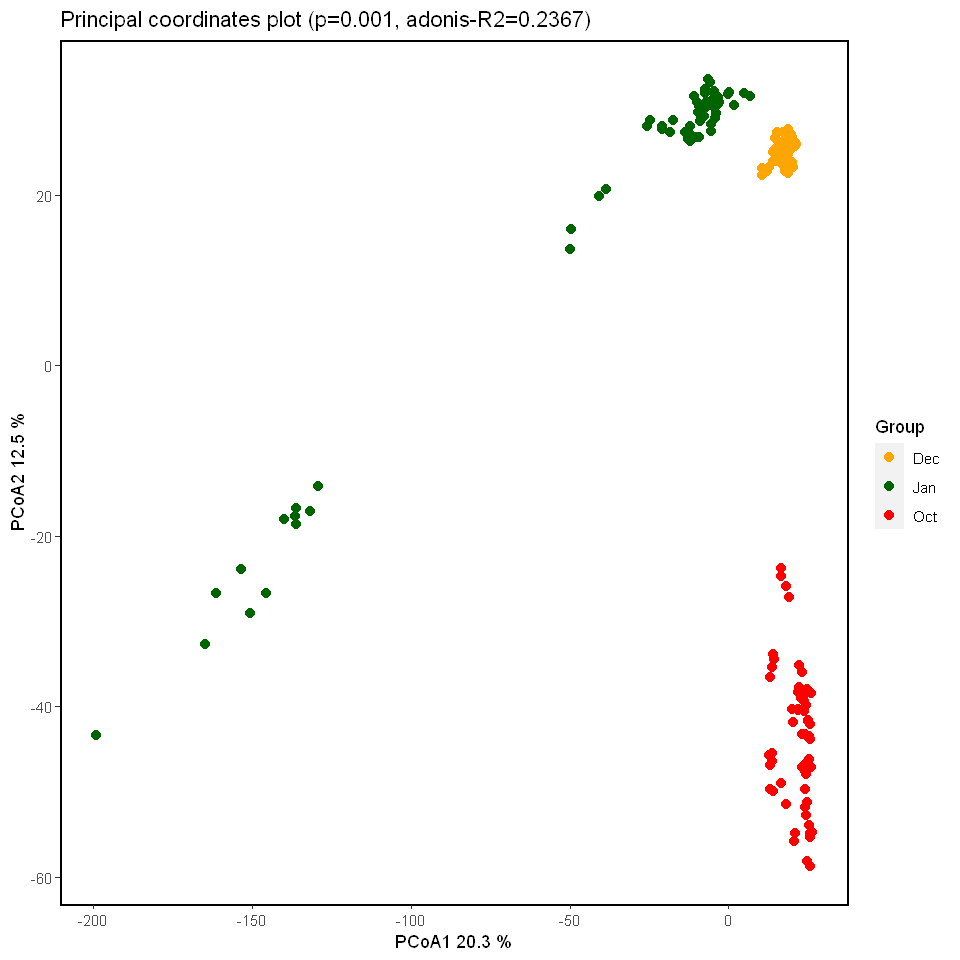

In [147]:
#svglite('PCoA_imputed-scaled_euclidean_Month.svg', width=10, height=10, bg='white') #uncomment to save as svg plot

plotPCoA(Imp_s, #desired feature table
         md_Samples, #corresponding metadata table
         distmetric = "euclidean", #desired distance metric
         catper = "ATTRIBUTE_Month", #desired group for permanova calculation
         catcols = "ATTRIBUTE_Month", #coloring the scores based on this group
         mdtype = 'categorical', #type of the desired group
         cols = c('orange','darkgreen','red','blue','black'),
         title = 'Principal coordinates plot') #change the title as you prefer

#dev.off() #uncomment while saving as svg plot

We can also test a different distance metric and look at the separation of samples. During data cleanup, we imputed all zero values. However, we can also use different distance metric that can deal better with missing values (e.g. Canberra).

We can also test whether there a significant differences in metabolomic profiles between different sample areas

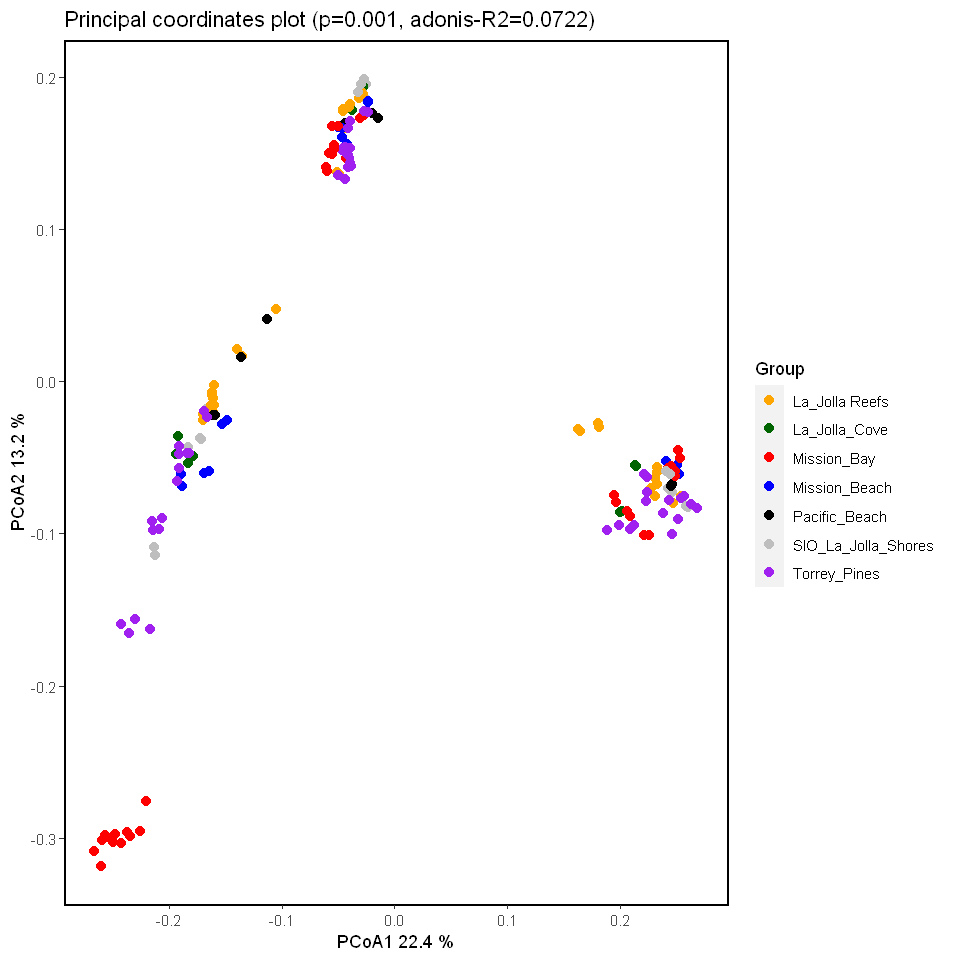

In [149]:
#svglite('PCoA_Imp_Scaled_NoCentering_bray_SampleArea.svg', width=10, height=10, bg='white') #uncomment to save as svg plot

plotPCoA(Imp_s, # not-centered, but scaled data
         md_Samples, 
         distmetric = "canberra", #canberra distance is used
         catper = "ATTRIBUTE_Sample_Area", # now a different group is used
         catcols = "ATTRIBUTE_Sample_Area", 
         mdtype = 'categorical', 
         cols = c('orange','darkgreen','red','blue','black','grey','purple'),
         title = 'Principal coordinates plot')

#dev.off() #uncomment while saving as svg plot

The results tell us that there are significant differences in the metabolomic profiles of seawater collected at different sampling areas (PERMANOVA p-value < 0.05). However, the differences are not as strong as the differences observed for month of sampling with only 7% (R2=0.0722) of the variation in the data explained by sampling area.

# <font color = 'blue'>  7. Conclusion </font>
<a name="outro"></a>

In [ ]:
sessionInfo() # to see all the information about the current R session

### Getting output files from Google Colab
For Google Collab users, we can zip the result folder which contains all the output files using the next cell and download the zip file directly from the folder "/content/My_TestData" into the local system.

In [ ]:
#Only for Google Colab
utils::zip(zipfile = 'TestData_Workflow_Results', files = "/content/My_TestData_Workflow_Results/")